<a href="https://colab.research.google.com/github/ddaviddn/4-beginner-dudes.MultipleLinearRegression/blob/master/Full_Multiple_Linear_Regression_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Multiple Linear Regression

**For this python project, we are running a full multiple linear regression analysis from using the imported libraries and modules, as well as basic python concepts.**

(Using the amazing sklearn: A Machine Learning Libary)

**Importing the necessary libraries and modules**

Why do we need these specific libraries/modules?



*   **NumPy** - This is a popular and essential library for working with any types of data set. This simplifies all the work when we're dealing with multi-dimensional arrays and matrices. It also makes operations on these arrays a breeze.

*   **pandas** - Another popular and essential library for dealing with data. Similar to NumPy, this simplifies and offers many different data manipulation and data analysis tools.

*   **Matplotlib** - This is a comprehensive library for creating static, animated, and interactive plots. This is well-known for transforming simple syntax into full and digestible data visualizations.

*   **Sklearn** - This is a module for machine learning built on SciPy and integrates classical machine learning algorithms. Features varying regression, classification, clustering algorithms, etc. 

*   **Seaborn** - A data visualization library based off matplotlib. It provides high-level visualizations. Creating more aesthetically pleasing and informative statistical graphics. A passive library, not specifically calling it but an addendum to matplotlib visualizations.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

### Optional, seaborn is a passive library for a more elegant data visualization
import seaborn as sns
sns.set()


**Creating the multiple linear regression function with the parameters**

> Similar to a simple linear regression, we are using a mixture of the previously imported libraries and modules, as well as some basic python code to output the results of the model.




For reference, the formula for adjusted R-squared is shown below:

![alt text](https://www.haghish.com/statistics/stata-blog/stata-programming/images/adjr2.png)

> In multiple linear regression the adjusted r-squared value is seen to be more useful than the non-adjusted r-squared value. With more variables (no matter the significance) being added to the model, the non-adjusted r-squared value will either always increase, or at the very least stay constant. On the other hand, adding insignificant variables to the model will cause the adjusted r-squared to decrease. It's important to note if there's a significant difference in the two values. 

In [0]:
def multlinreg(path, x1, x2, y):

  data = pd.read_csv(path)

  print(data.head())
  ### Change the x array if there are additional predictor variables 
  x = data[[x1,x2]]
  y_values = data[y]

  ### In a general case, you could also use:
# x = data.iloc[:,:-1].values
# y = data.iloc[:,-1].values
  ### If the variable you're trying to predict is in the last column 
  ### (in most cases it is) we can use the code I have shown above. But 
  ### to make the coding more intuitive and beginner friendly, we can just 
  ### label the columns as whatever the variables are named in the dataset. 

  reg = LinearRegression()
  reg.fit(x,y_values)
  
  ### Refer to the above text box if you're curious about the adjusted r-squared
  ### calculation. You can also print out the shape of x to see which numbers
  ### we're using for the adjusted r-sqaure calculation. 

  r2 = reg.score(x,y_values)
  adj = 1-(1-r2)*(x.shape[0]-1)/(x.shape[0]-x.shape[1]-1)
  p = f_regression(x,y_values)[1]
  coef = reg.coef_
  intercept = reg.intercept_

  # x1 = np.array(x1)
  y_values = np.array(y_values).reshape(-1,1)

  f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (15,3))
  ax1.tick_params(axis='x',colors='black')
  ax1.tick_params(axis='y',colors='black')
  ax1.scatter(data[x1],y_values,alpha = 0.8)
  ax1.set_title(""+str(x1)+" and "+str(y)+"",color = 'black',fontsize=22)
  ax2.tick_params(axis='x',colors='black')
  ax2.tick_params(axis='y',colors='black')
  ax2.scatter(data[x2],y_values,alpha = 0.8)
  ax2.set_title(""+str(x2)+" and "+str(y)+"",color = 'black',fontsize=22)
  plt.show()


  print("\nThe R-sqaured value is " + str(round(r2,3)) +".")
  print("\nThe adjusted R-sqaured value is " + str(round(adj,3)) +".")

  for i in range(len(coef)):
    print("\nThe coefficient for "+str(x.columns.values[i])+" is "+str(coef.round(3)[i])+".")
  print("\nThe intercept is: "+str(round(intercept,3)))

  reg_summary = pd.DataFrame(x.columns.values,columns = ['Features'])
  reg_summary ['Coefficients'] = coef.round(3)
  reg_summary ['P-Values'] = p.round(3)
  print("\n" + str(reg_summary))


  return ":)"

**Creating the function that will allow us to predict a response variable**

Since we're running a regression, we should also test the effectiveness of our model by running some predictions. This function should allow us to do so, if we input the parameters similar to the previous function, as well as adding values we are trying to predict. It is a good way to check if our model's predictions are accurate and sensible.

In [0]:
def predictions(path, x1, x2, y, x1_pred, x2_pred):

  data = pd.read_csv(path)

  x = data[[x1,x2]]
  y = data[y]

  reg = LinearRegression()
  reg.fit(x,y)

  coef = reg.coef_
  intercept = reg.intercept_

######Estimations using our model########

  examples = pd.DataFrame({'const':1,str(x1):x1_pred,
                         str(x2):x2_pred})
  examples = examples[['const',str(x1),str(x2)]]


  predictions = intercept + coef[0]*x1_pred + coef[1]*x2_pred
  predictions = predictions.round(3)

  pred = pd.DataFrame({"Predicted Home Price":predictions})
  full = examples.join(pred)

  # print(full.rename(index = {0:'House 1',1:'House 2',2:'House 3'}))
  return full


# REAL EXAMPLE:
**After we've created our personalized multiple linear regression function let's continue by using our model on a real dataset**

Let's test out the model we just used on this imported dataset. Using this multiple linear regression model in sklearn, we are predicting the price based off of the size and the year of the house. This function will end up outputting everything that we included in the above code cell. This should be a sufficient function if we are doing multiple linear regression with 2 explanatory variables to try and predict a response variable.



To avoid confusion, we are starting off with a simple dataset with just three variables. We are using the size and the year of a house to predict the price of the home in a particular area of the country. The units of the size values will be in square feet and the price will be shown as $USD. 

In [0]:
example = pd.read_csv('real_estate_price_size_year.csv')

example

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


        price     size  year
0  234314.144   643.09  2015
1  228581.528   656.22  2009
2  281626.336   487.29  2018
3  401255.608  1504.75  2015
4  458674.256  1275.46  2009


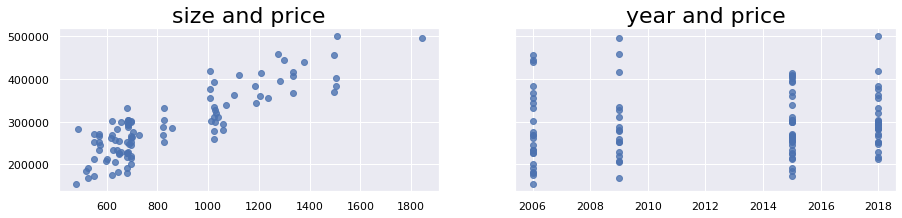


The R-sqaured value is 0.776.

The adjusted R-sqaured value is 0.772.

The coefficient for size is 227.701.

The coefficient for year is 2916.785.

The intercept is: -5772267.017

  Features  Coefficients  P-Values
0     size       227.701     0.000
1     year      2916.785     0.357


':)'

In [0]:
multlinreg('real_estate_price_size_year.csv','size','year','price')

# Using our prediction function

Using the same context for the multiple linear regression, our inputs for the function need to be numpy arrays. Let's try to predict what the price of a house would be given some arbitrary sizes and years of some homes. These values correspond with eachother, meaning that the matching indexes will be the characteristics of a house. For example, the first value in both of the arrays are 500 and 2005. This would mean the house is 500 square feet (a very small house) and it was made in year 2005. Let's try to predict what the price of a house would be given these traits.

In [0]:
ex_size = np.array ([500,1000,600])
ex_year = np.array ([2005,2007,2007])

predictions('real_estate_price_size_year.csv','size','year','price',ex_size, ex_year)

,const,size,year,Predicted Home Price
0,1,500,2005,189737.990
1,1,1000,2007,309421.988
2,1,600,2007,218341.646


As we can see from the outputted table, the predicted home price of this area for a home that is 500 square feet and made in the year 2005 is about $189,736.99. With similar interpretations for the other values, we get what is shown in the table as the home prices for the corresponding size and year of the house. 

# Plotting a multiple linear regression on a three-dimensional graph

> For fun, I wanted to include what the scatter plot may look like and add more data visualization tools to your kit. **This will only work if there are 3 variables**, any more and the graphs could get very tedious and abstract. The 3D graph is totally optional and just for fun. Although we could have just used sets of 2D scatter plots to display the interactions between all the independent and dependent variables, it seemed more interesting and beneficial to show three-dimensional plots in Python. 3D graphs are also always fun to visualize. 


**Using Matplotlib**


I have implemented the next sets of codes to show basic a basic 3D scatterplot visual in matplotlib. Importing another matplotlib tool in order for us to display a three-dimensional plot. We can also fiddle around with the options to get the plot to our liking and becoming more familiar with matplotlib's notation. 



In [0]:
from mpl_toolkits.mplot3d import Axes3D

def threeD_plot(path, x1, x2, y):
  
  data = pd.read_csv(path)

  x_1 = data[x1]
  y_1 = data[x2]
  z_1 = data[y]
  z_1 = data[y]/1000

  cm = plt.get_cmap('jet')
  col = np.arange(len(z_1))

  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111,projection='3d')
  ax.scatter(x_1,y_1,z_1, c=col,s=20, marker='o',alpha = 1)

  ax.set_xlabel(str(x1))
  ax.set_ylabel(str(x2))
  ax.set_zlabel(str(y)+" (in thousands)")

  return plt.show()


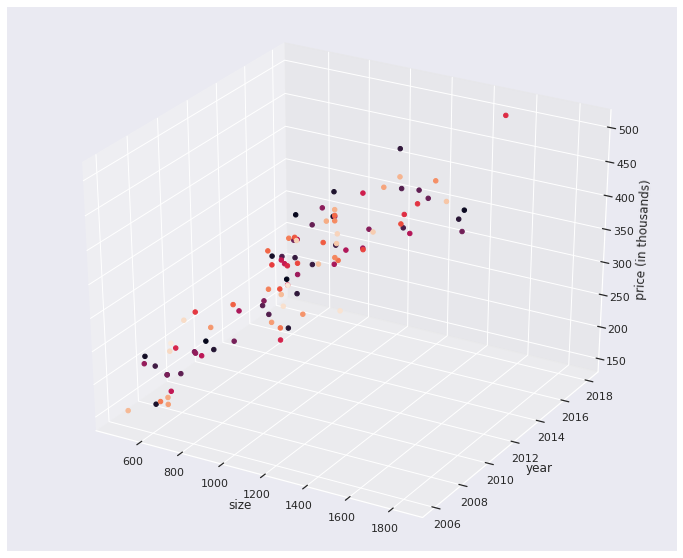

In [0]:
threeD_plot('real_estate_price_size_year.csv','size','year','price')

**Using Plotly**

This is another library that displays spectacular data visualizations. Similar to matplotlib, the syntax is quite easy to follow and with limited lines of code being written, a more modern and aesthetic visual is shown. This is also an interactive plot, we can hold and drag to view the scatter plot from different angles and it is quite a lovely tool to use when trying to visualize an output. I am adding this to diversify your Python knowledge. Another reason why I added this was because it's quite difficult adding a gradient colorway to matplotlib, so for simplicity, I came to the Plotly library. Adding a color gradient to the graph is a very convenient way to give the scatter plot some depth. 

In [0]:
import plotly.express as px

def threeD_plot_2(path, x1, x2, y):
  
  data = pd.read_csv(path)

  x_1 = data[x1]
  y_1 = data[x2]
  z_1 = data[y]
  z_1 = data[y]

  fig = px.scatter_3d(data,x=x_1,y=y_1,z=z_1,size_max=1, color=z_1,opacity=0.8)

  fig.update_layout(
      title = 'Multiple Linear Regression: '+str(x1)+' and '+str(x2)+' = '+str(y),
      xaxis_title = str(x1),
      yaxis_title = str(x2),
      # zaxis_title = str(y),
      font = dict(
          family = 'Courier New, monospace',
          size=12,
          color='dark grey'
      )
  )

  return fig.show()

In [0]:
threeD_plot_2('real_estate_price_size_year.csv','size','year','price')

# Hopefully you enjoyed this walkthrough of the multiple linear regression in Python :)

Give yourself a pat on the back, you deserved it. This is a great first example of a multiple linear regression in Python. Although it was a simple dataset, it's  almost never going to be this way. I will be showcasing another detailed example of a multiple linear regression where the next dataset will be drastically different. There is no need to be scared though! The process is going to be similar to this with some slight variations and added difficulty. I'm going to try and make this as intuitive as I can while we can try and gain a deeper understanding so that you can someday branch out and apply this into the real-world. :)

By: David Nguyen

![Congratulations!](https://contenthub-static.grammarly.com/blog/wp-content/uploads/2019/04/thumbnail-7075f02d50b2e1b87acaac02e0592003.jpeg)